# Árbol de Decisión - Predicción de ImpactPlayerScore en CS:GO
Este notebook sigue la metodología CRISP-DM hasta la fase 4 para evaluar el modelo de regresión: **Árbol de Decisión**.

In [ ]:
# Cargar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.tree import DecisionTreeRegressor


In [ ]:
#Cargar datos y crear variables

url = "https://raw.githubusercontent.com/Seba-RiveraC/Crisp_DM_CSGO/refs/heads/master/Anexo%20ET_demo_round_traces_2022%20(1).csv"
df = pd.read_csv(url, sep=';')
# Crear variables necesarias
df['ImpactPlayerScore'] = df['RoundKills'] + 0.5 * df['RoundAssists'] + df['RoundHeadshots']
df['KAST'] = ((df['RoundKills'] > 0) | (df['RoundAssists'] > 0)).astype(int)
df = df.sample(frac=0.7, random_state=42)

<ipython-input-2-a661481f7ff5>:4: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, sep=';')


In [ ]:
# Fase 3 - Preparación de datos y limpieza
df_model = df.copy()
df_model = df_model.applymap(lambda x: str(x) if isinstance(x, str) or isinstance(x, bool) else x)
df_model = df_model.replace({'True': True, 'False': False, 'TRUE': True, 'FALSE': False})
for col in df_model.columns:
    if df_model[col].dtype == bool:
        df_model[col] = df_model[col].astype(int)
categorical_cols = df_model.select_dtypes(include='object').columns.tolist()
df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

<ipython-input-3-6e3455b4a4bb>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_model = df_model.applymap(lambda x: str(x) if isinstance(x, str) or isinstance(x, bool) else x)
<ipython-input-3-6e3455b4a4bb>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_model = df_model.replace({'True': True, 'False': False, 'TRUE': True, 'FALSE': False})



Modelo: Árbol de Decisión (sin escalado)
MAE: 0.6995235689020429
MSE: 1.6980978849346713
RMSE: 1.303110849058771
R²: 0.06408892280961553


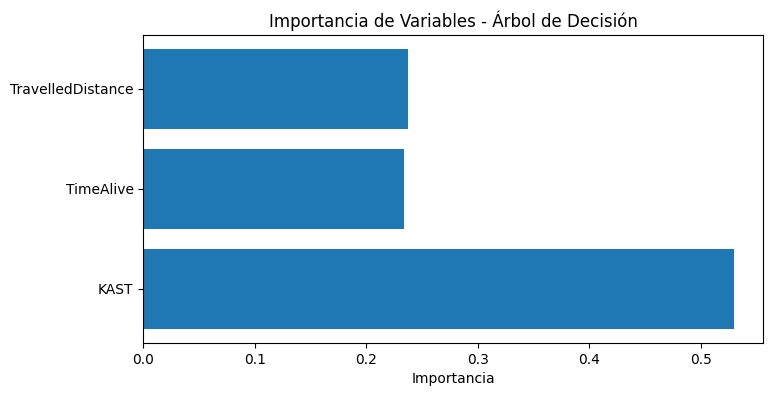

In [ ]:
# Fase 4 - Modelado: Árbol de Decisión
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Copiar datos
df_model = df.copy()


def convertir_a_float(valor):
    if isinstance(valor, str):
        valor = valor.replace('.', '').replace(',', '.')
        try:
            return float(valor)
        except:
            return np.nan
    return valor

# Limpiar columnas numéricas
columnas = ['TimeAlive', 'TravelledDistance', 'KAST', 'ImpactPlayerScore']
for col in columnas:
    df_model[col] = df_model[col].apply(convertir_a_float)

# Eliminar nulos
df_model.dropna(subset=columnas, inplace=True)

# Variables predictoras y objetivo
X = df_model[['KAST', 'TimeAlive', 'TravelledDistance']]
y = df_model['ImpactPlayerScore']

# División del conjunto
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Modelo Árbol de Decisión
modelo_tree = DecisionTreeRegressor(random_state=42)
modelo_tree.fit(X_train, y_train)

# Predicciones
y_pred_tree = modelo_tree.predict(X_test)

# Evaluación
print("\nModelo: Árbol de Decisión")
print("MAE:", mean_absolute_error(y_test, y_pred_tree))
print("MSE:", mean_squared_error(y_test, y_pred_tree))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_tree)))
print("R²:", r2_score(y_test, y_pred_tree))

# Importancia de variables
importancia = modelo_tree.feature_importances_
variables = X.columns

plt.figure(figsize=(8, 4))
plt.barh(variables, importancia)
plt.xlabel("Importancia")
plt.title("Importancia de Variables - Árbol de Decisión")
plt.show()




Segun se ha visto en los analisis, los resultados de arbol de decision han sido los mas bajos por lo que quedaria descartado de usarse en fases posteriores del crisp-dm